In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# open genai_dimension.csv (foundation model)
with open("data/gen-ai/Gen AI/genai_dimension.csv", "r") as f:
    genai_dimension = pd.read_csv(f)

print(genai_dimension.head())

   GenAI Model Company GenAI Model Family      GenAI Model Release Date  \
0  Alibaba (Qwen Team)               Qwen            Qwen2   2024-06-07   
1  Alibaba (Qwen Team)               Qwen  QwQ-32B-Preview   2024-11-28   
2  Alibaba (Qwen Team)               Qwen          Qwen2.5   2024-09-19   
3  Alibaba (Qwen Team)               Qwen      Qwen2.5-Max   2025-01-28   
4  Alibaba (Qwen Team)               Qwen            Qwen3   2025-04-29   

    Model ID / Endpoint                     Model Type Modalities (Input)  \
0                 Qwen2    Text LLM (some open-weight)               text   
1  Qwen/QwQ-32B-Preview    Reasoning LLM (open-weight)               text   
2               Qwen2.5                Text LLM family               text   
3           qwen2.5-max                 Text MoE (API)               text   
4                 Qwen3  Text LLM family (open-weight)         text,image   

  Modalities (Output)  has_reasoning              reasoning_mode  \
0                t

In [3]:
# list all unique model families
print(genai_dimension["GenAI Model Family"].unique())

['Qwen' 'Claude' 'DeepSeek' 'DeepSeek-VL' 'Gemini' 'Imagen' 'Veo' 'PaLM'
 'LaMDA' 'Llama' 'Mixtral' 'Mistral Large' 'Mistral Medium' 'Magistral'
 'Mistral' 'Mistral OCR' 'GPT' 'o-series' 'GPT-OSS' 'DALL-E' 'Sora'
 'Whisper' 'Grok']


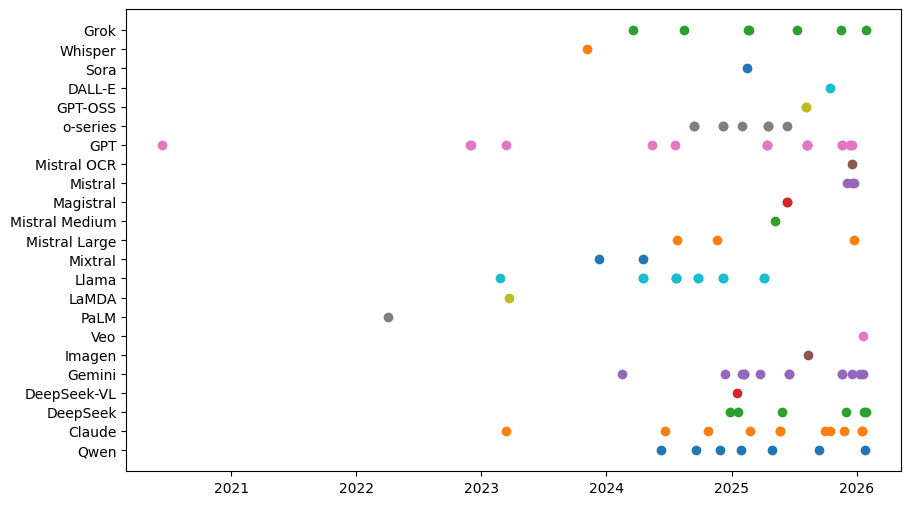

In [4]:
# graph releases of different model families over time
genai_dimension["Release Date"] = pd.to_datetime(genai_dimension["Release Date"])
plt.figure(figsize=(10, 6))
for family in genai_dimension["GenAI Model Family"].unique():
    family_data = genai_dimension[genai_dimension["GenAI Model Family"] == family]
    plt.scatter(family_data["Release Date"], [family] * len(family_data), label=family)

In [7]:
# open genai_research_dimension.csv (research breakthrough)
with open("data/gen-ai/Gen AI/genai_research_dim.csv", "r", encoding='utf-8', errors='ignore') as f:
    genai_research_dim = pd.read_csv(f)

print(genai_research_dim.head())

                                               title     authors_short  \
0  Sequence to Sequence Learning with Neural Netw...  Sutskever et al.   
1  Neural Machine Translation by Jointly Learning...   Bahdanau et al.   
2                             Neural Turing Machines     Graves et al.   
3  Convolutional Neural Networks for Sentence Cla...               Kim   
4  Distributed Representations of Sentences and D...      Le & Mikolov   

                                          authors  release_year  \
0       Ilya Sutskever, Oriol Vinyals, Quoc V. Le          2014   
1  Dzmitry Bahdanau, Kyunghyun Cho, Yoshua Bengio          2014   
2                              Alex Graves et al.          2014   
3                                        Yoon Kim          2014   
4                          Quoc Le, Tomas Mikolov          2014   

  submission_date                                          tags  
0      2014-09-10       Seq2Seq; Foundations; Language modeling  
1      2014-09-14   

In [9]:
# print all unique tags by splitting by ;
unique_tags = set()
for tags in genai_research_dim["tags"].dropna():
    for tag in tags.split(";"):
        unique_tags.add(tag.strip())

print(unique_tags)

{'RoPE', 'Seq2Seq', 'Document embeddings', 'Architecture', 'Systems', 'Quantization', 'Transformers', 'Foundation models', 'Interpretability', 'Practical size', 'Prompting', 'Fine-tuning', 'Language modeling', 'ALBERT', 'Human feedback', 'RAG', 'Positional embeddings', 'Alignment', 'FLAN', 'RLHF foundations', 'Foundations', 'Scaling laws', 'In Context Learning', 'Evaluation', 'Multilingual', 'T5', 'Reinforcement Learning', 'Contextual representations', 'Serving', 'Compute optimality', 'Hybrid SSM', 'Uncategorized', 'Fine Tuning', 'Software engineering', 'RLHF', 'Representation learning', 'Agentic', 'Multimodal', 'Instruction tuning', 'Vision Language', 'Transfer learning', 'Few-shot', 'Attention critique', 'GPT-2', 'Retrieval', 'Sentence embeddings', 'KV cache', 'Self-attention', 'Scaling', 'Small LLM', 'Open LLM', 'RL', 'NMT', 'Model Architecture', 'DeBERTa', 'DPO', 'Coding', 'GPT', 'CoT', 'MoE', 'Tool use', 'BERT', 'RoBERTa', 'Decoding', 'Text generation', 'Pretraining', 'Post-traini

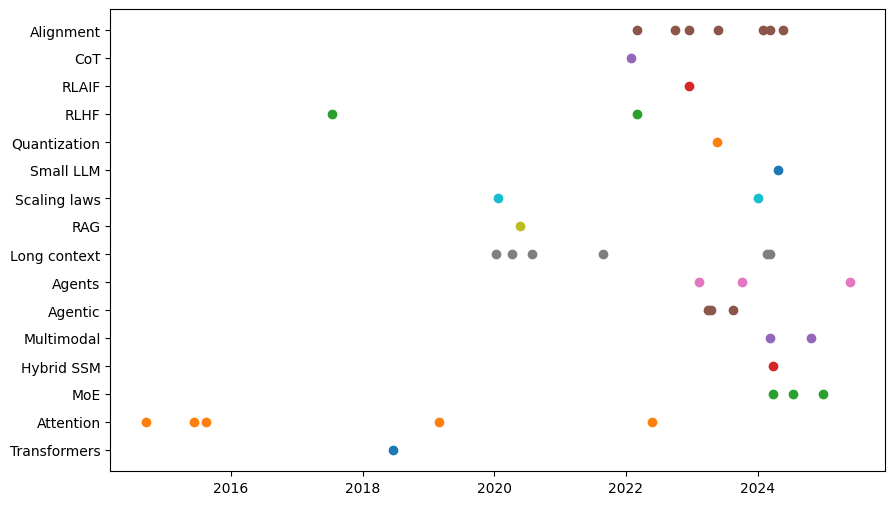

In [14]:
# graph papers by tag over time
tags = ["Transformers", "Attention", "MoE", "Hybrid SSM", "Multimodal", "Agentic", "Agents", "Long context", "RAG", "Scaling laws", "Small LLM", "Quantization", "RLHF", "RLAIF", "CoT", "Alignment"]
genai_research_dim["submission_date"] = pd.to_datetime(genai_research_dim["submission_date"])
plt.figure(figsize=(10, 6))
for tag in tags:
    tag_data = genai_research_dim[genai_research_dim["tags"].str.contains(tag, na=False)]
    plt.scatter(tag_data["submission_date"], [tag] * len(tag_data), label=tag)

In [15]:
# open ml_hardware.csv (research breakthrough)
with open("data/ml_hardware.csv", "r", encoding='utf-8', errors='ignore') as f:
    ml_hardware = pd.read_csv(f)

print(ml_hardware.head())

                    Hardware name Manufacturer Type  \
0                Amazon Trainium3   Amazon AWS  GPU   
1          Google TPU v7 Ironwood       Google  TPU   
2               Huawei Ascend 920       Huawei  NPU   
3  NVIDIA GB300 (Blackwell Ultra)       NVIDIA  GPU   
4   NVIDIA B300 (Blackwell Ultra)       NVIDIA  GPU   

                                               Notes Release date  \
0  Source for TDP: https://newsletter.semianalysi...   2025-12-02   
1  source for release date: https://www.cnbc.com/...   2025-11-06   
2                                                NaN   2025-10-01   
3  Individual GPUs are sometimes called Blackwell...   2025-08-22   
4  Individual GPUs are sometimes called Blackwell...   2025-08-22   

   Release price (USD)  Tensor-FP16/BF16 performance (FLOP/s)  \
0                  NaN                           6.710000e+14   
1                  NaN                           2.307000e+15   
2                  NaN                           9.000000e+

9 9
89 48


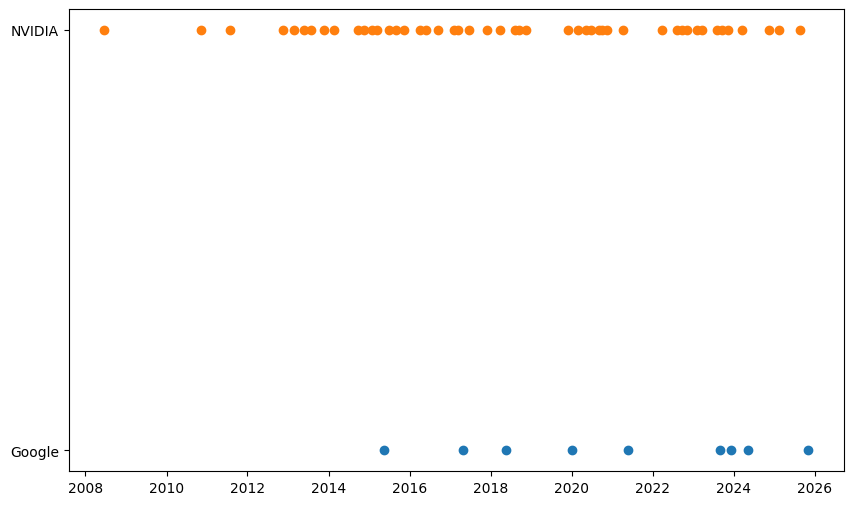

In [ ]:
# graph by type over time, only use Google TPU or NVIDIA GPU
ml_hardware["Release date"] = pd.to_datetime(ml_hardware["Release date"])
plt.figure(figsize=(10, 6))
for manufacturer_type in ["Google", "NVIDIA"]:
    type_data = ml_hardware[ml_hardware["Manufacturer"] == manufacturer_type]
    # only graph TPUs or GPUs, delete releases that are within one month of each other (keep only first occurrence) to reduce clutter
    type_data = type_data[type_data["Type"].isin(["TPU", "GPU"])]
    type_data = type_data.sort_values("Release date")
    new_type_data = []
    last_date = None
    for _, row in type_data.iterrows():
        if last_date is None or (row["Release date"] - last_date).days > 30:
            new_type_data.append(row)
            last_date = row["Release date"]
    new_type_data = pd.DataFrame(new_type_data)
    plt.scatter(new_type_data["Release date"], [manufacturer_type] * len(new_type_data), label=manufacturer_type)

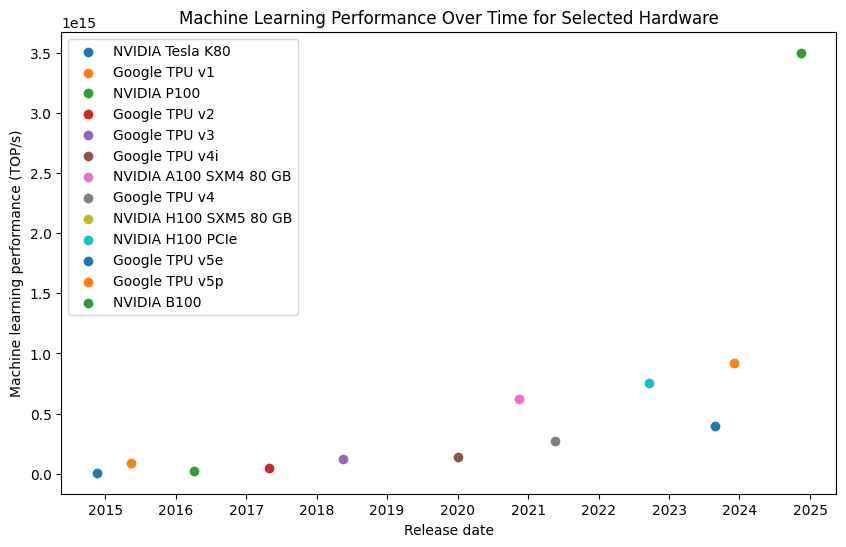

In [30]:
hardware = [
    "NVIDIA Tesla K80",
    "Google TPU v1",
    "NVIDIA P100",
    "Google TPU v2",
    "Google TPU v3",
    "Google TPU v4i",
    "NVIDIA A100 SXM4 80 GB",
    "Google TPU v4",
    "NVIDIA H100 SXM5 80 GB",
    "NVIDIA H100 PCIe",
    "Google TPU v5e",
    "Google TPU v5p",
    "NVIDIA B100"
]

# graph Machine learning performance (TOP/s) over time for these hardware
plt.figure(figsize=(10, 6))
for hardware_name in hardware:
    hardware_data = ml_hardware[ml_hardware["Hardware name"] == hardware_name]
    plt.scatter(hardware_data["Release date"], hardware_data["ML OP/s"], label=hardware_name)
plt.legend()
plt.xlabel("Release date")
plt.ylabel("Machine learning performance (TOP/s)")
plt.title("Machine Learning Performance Over Time for Selected Hardware")
plt.show()

In [35]:
# format and print key dates for each (hardware, model family, research breakthrough) in a table
key_dates = []
for hardware_name in hardware:
    hardware_data = ml_hardware[ml_hardware["Hardware name"] == hardware_name]
    if not hardware_data.empty:
        release_date = hardware_data["Release date"].iloc[0].date()
        key_dates.append((hardware_name, "Hardware", release_date))
for family in genai_dimension["GenAI Model Family"].unique():
    family_data = genai_dimension[genai_dimension["GenAI Model Family"] == family]
    if not family_data.empty:
        release_date = family_data["Release Date"].min().date()
        key_dates.append((family, "Model Family", release_date))
for tag in tags:
    tag_data = genai_research_dim[genai_research_dim["tags"].str.contains(tag, na=False)]
    if not tag_data.empty:
        release_date = tag_data["submission_date"].min().date()
        key_dates.append((tag, "Research", release_date))
key_dates = sorted(key_dates, key=lambda x: x[2])
print("{:<30} {:<30} {:<30}".format("Name", "Type", "Date"))
for name, type_, date in key_dates:
    print("{:<30} {:<30} {:<30}".format(name, type_, date.isoformat()))

Name                           Type                           Date                          
Attention                      Research                       2014-09-14                    
NVIDIA Tesla K80               Hardware                       2014-11-17                    
Google TPU v1                  Hardware                       2015-05-15                    
NVIDIA P100                    Hardware                       2016-04-05                    
Google TPU v2                  Hardware                       2017-05-01                    
RLHF                           Research                       2017-07-12                    
Google TPU v3                  Hardware                       2018-05-18                    
Transformers                   Research                       2018-06-18                    
Google TPU v4i                 Hardware                       2020-01-01                    
Long context                   Research                       2020-01-

In [36]:
# save to csv
key_dates_df = pd.DataFrame(key_dates, columns=["Name", "Type", "Date"])
key_dates_df.to_csv("key_dates.csv", index=False)